# Modules

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

#Linear Regression with Diabetes Dataset

In [ ]:
diabetes_data=datasets.load_diabetes(as_frame=True)

In [ ]:
type(diabetes_data)

sklearn.utils._bunch.Bunch

In [ ]:
diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
#X data
x=diabetes_data.data

In [ ]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
#Y label
y=diabetes_data.target

In [ ]:
X_train,x_test,Y_train,y_test=train_test_split(x,y)

In [ ]:
#Cross Validation Set and Test set
X_cv,x_test,Y_cv,y_test=train_test_split(x_test,y_test)

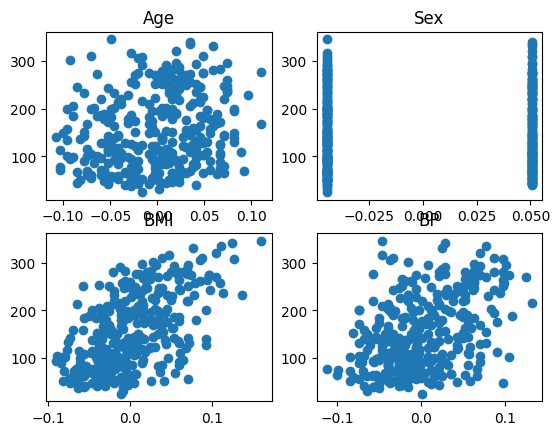

In [ ]:
#Plot Graph on bases of Training set
fig,axis=plt.subplots(2,2)
axis[0,0].set_title("Age")
axis[0,0].scatter(X_train['age'],Y_train)
axis[0,1].set_title("Sex")
axis[0,1].scatter(X_train['sex'],Y_train)
axis[1,0].set_title("BMI")
axis[1,0].scatter(X_train['bmi'],Y_train)
axis[1,1].set_title("BP")
axis[1,1].scatter(X_train['bp'],Y_train)

In [ ]:
#Initializing a Linear Regression Model
linear_regression=LinearRegression()

In [ ]:
#Training the model
linear_regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Test with Cross Validation set
y_pred_cv=linear_regression.predict(X_cv)

In [ ]:
mean_squared_error(Y_cv,y_pred_cv)

2916.678959465798

In [ ]:
#Weight and Bias
print(linear_regression.coef_)
print(linear_regression.intercept_)

[   8.41475062 -265.66597008  537.46926265  294.10055988 -796.99177946
  496.49270526   88.95785808  139.23921897  758.18035319   81.61905209]
151.26942430213987


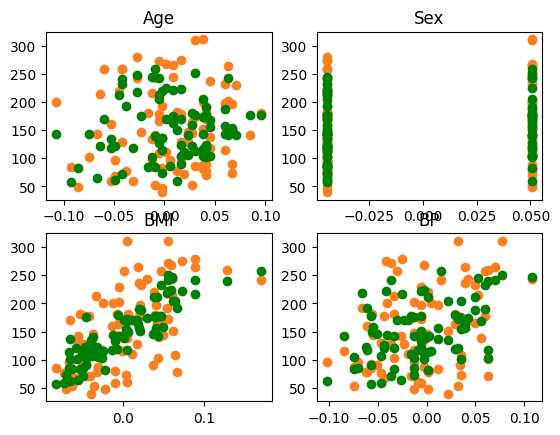

In [ ]:
#Plotting Cross Validation
fig,axis=plt.subplots(2,2)
axis[0,0].set_title("Age")
axis[0,0].scatter(X_cv['age'],Y_cv,c="#FD7F20")
axis[0,0].scatter(X_cv['age'],y_pred_cv,c="g")
axis[0,1].set_title("Sex")
axis[0,1].scatter(X_cv['sex'],Y_cv,c="#FD7F20")
axis[0,1].scatter(X_cv['sex'],y_pred_cv,c="g")
axis[1,0].set_title("BMI")
axis[1,0].scatter(X_cv['bmi'],Y_cv,c="#FD7F20")
axis[1,0].scatter(X_cv['bmi'],y_pred_cv,c="g")
axis[1,1].set_title("BP")
axis[1,1].scatter(X_cv['bp'],Y_cv,c="#FD7F20")
axis[1,1].scatter(X_cv['bp'],y_pred_cv,c="g")

In [ ]:
#Predicting with Test data
y_pred=linear_regression.predict(x_test)

In [ ]:
mean_squared_error(y_test,y_pred)

1475.7918103180368

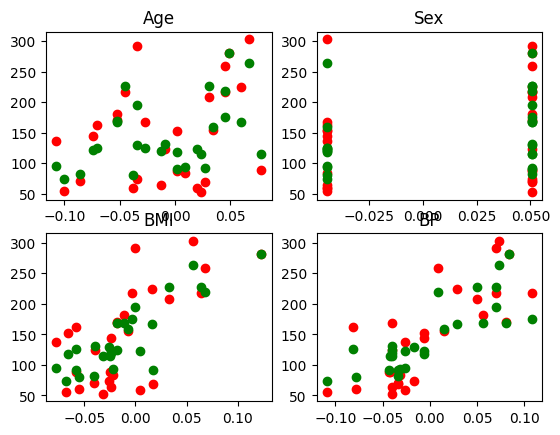

In [ ]:
#Plotting Test data
fig,axis=plt.subplots(2,2)
axis[0,0].set_title("Age")
axis[0,0].scatter(x_test['age'],y_test,c="r")
axis[0,0].scatter(x_test['age'],y_pred,c="g")
axis[0,1].set_title("Sex")
axis[0,1].scatter(x_test['sex'],y_test,c="r")
axis[0,1].scatter(x_test['sex'],y_pred,c="g")
axis[1,0].set_title("BMI")
axis[1,0].scatter(x_test['bmi'],y_test,c="r")
axis[1,0].scatter(x_test['bmi'],y_pred,c="g")
axis[1,1].set_title("BP")
axis[1,1].scatter(x_test['bp'],y_test,c="r")
axis[1,1].scatter(x_test['bp'],y_pred,c="g")

# Logistic Regression with E-mail Spam Dataset

In [ ]:
email_data=pd.read_csv('email_spam.csv')

In [ ]:
email_data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
X=email_data.text

In [ ]:
#Mails
X

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [ ]:
#Vectorizing text data
vect=TfidfVectorizer()
X=vect.fit_transform(X)
vect.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzocb', 'zzso', 'zzsyt'], dtype=object)

In [ ]:
Y=email_data.label

In [ ]:
#Label
Y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [ ]:
X_train,x,Y_train,y=train_test_split(X,Y)

In [ ]:
x_cv,x_test,y_cv,y_test=train_test_split(x,y)

In [ ]:
logistic_regression=LogisticRegression()

In [ ]:
logistic_regression.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#Cross Validation
y_cv_pred=logistic_regression.predict(x_cv)

In [ ]:
accuracy_score(y_cv_pred,y_cv,normalize=False)

961

In [ ]:
y_cv.shape

(969,)

In [ ]:
#Test data set
y_pred=logistic_regression.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test,normalize=False)

315

In [ ]:
y_test.shape

(324,)

# Tensorflow Softmax and ReLu function using Iris Dataset

In [ ]:
iris=pd.read_csv('IRIS.csv')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X=iris.iloc[:,:-1]

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Y=iris.species

In [ ]:
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(Y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_cat=to_categorical(y_encoded)

In [ ]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
#Split Train data
X_train,x,Y_train,y=train_test_split(X,y_cat)

In [ ]:
#Cross Validataion data
x_cv,x_test,y_cv,y_test=train_test_split(x,y)

In [ ]:
#Creating Neural Network
model=Sequential(
    [
        Input(shape=X_train.shape[1:]),
        Dense(1000,'relu'),
        Dense(500,'relu'),
        Dense(300,'relu'),
        Dense(3,'softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss=CategoricalCrossentropy(),metrics=CategoricalAccuracy())

In [ ]:
model.fit(X_train,Y_train,epochs=50,verbose=1,validation_data=(x_cv,y_cv))

Epoch 1/50
4/4 [==============================] - 1s 94ms/step - loss: 4.0718 - categorical_accuracy: 0.3036 - val_loss: 0.9102 - val_categorical_accuracy: 0.4643
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6836 - categorical_accuracy: 0.5982 - val_loss: 0.5768 - val_categorical_accuracy: 0.5714
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.3870 - categorical_accuracy: 0.8214 - val_loss: 0.2543 - val_categorical_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 28ms/step - loss: 0.1705 - categorical_accuracy: 0.9554 - val_loss: 0.1118 - val_categorical_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 26ms/step - loss: 0.4660 - categorical_accuracy: 0.8214 - val_loss: 0.4232 - val_categorical_accuracy: 0.8571
Epoch 6/50
4/4 [==============================] - 0s 31ms/step - loss: 0.3689 - categorical_accuracy: 0.8571 - val_loss: 0.7357 - val_categorical_accuracy: 0.6786
Epoch 7/50
4/4 [======

In [ ]:
model.evaluate(x_cv,y_cv)

1/1 [==============================] - 0s 27ms/step - loss: 0.0275 - categorical_accuracy: 1.0000


[0.027486665174365044, 1.0]

In [ ]:
y_prediction=model.predict(x_test)

1/1 [==============================] - 0s 102ms/step


In [ ]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
for pred in y_prediction:
  print(np.argmax(pred))

0
2
1
1
2
2
0
2
0
1


In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.1154 - categorical_accuracy: 0.9000


[0.11539934575557709, 0.8999999761581421]

# K-means Clustering with News Article

In [ ]:
articles=pd.read_excel('Articles.xls')

In [ ]:
articles

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,2015-01-01 00:00:00,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,2015-02-01 00:00:00,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,2015-05-01 00:00:00,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,2015-06-01 00:00:00,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,2015-06-01 00:00:00,us oil prices slip below 50 a barr,business
...,...,...,...,...
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business


In [ ]:
X=articles['Article']

In [ ]:
Y=articles['NewsType']

In [ ]:
X

0       KARACHI: The Sindh government has decided to b...
1       HONG KONG: Asian markets started 2015 on an up...
2       HONG KONG:  Hong Kong shares opened 0.66 perce...
3       HONG KONG: Asian markets tumbled Tuesday follo...
4       NEW YORK: US oil prices Monday slipped below $...
                              ...                        
2687    strong>DUBAI: Dubai International Airport and ...
2688    strong>BEIJING: Former Prime Minister, Shaukat...
2689    strong>WASHINGTON: Uber has grounded its fleet...
2690    strong>BEIJING: The New Development Bank plans...
2691    strong>KARACHI: Karachi-based technology incub...
Name: Article, Length: 2692, dtype: object

In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
vect=TfidfVectorizer(lowercase=True)
X=vect.fit_transform(X)

In [ ]:
kmean=KMeans(n_clusters=2,max_iter=1000)

In [ ]:
kmean.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=2)

In [ ]:
y_pred=kmean.predict(X)

In [ ]:
silhouette_score(X,y_pred)

0.007647726385680743

In [ ]:
pca_composition=PCA(n_components=2)
X_pca=pca_composition.fit_transform(X.toarray())

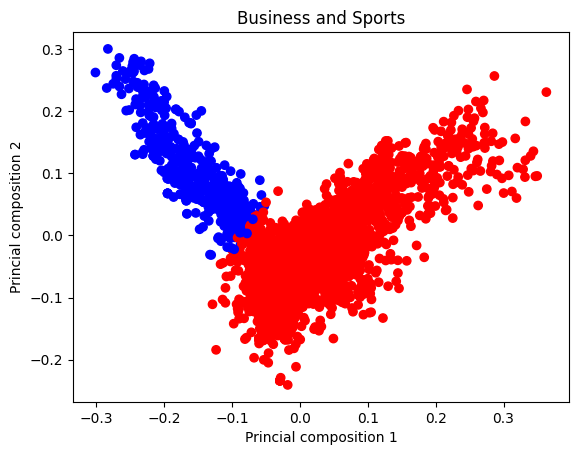

In [ ]:
plt.title("Business and Sports")
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred,cmap='bwr')
plt.xlabel("Princial composition 1")
plt.ylabel("Princial composition 2")
plt.show()

# Anomoly Detection with Credit Card Fraud Dataset

In [ ]:
creditcard=pd.read_csv('creditcard.csv')

In [ ]:
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23318,32696,1.071505,0.187075,0.895129,2.656099,-0.452814,0.179717,-0.247008,0.215500,-0.248462,...,-0.050902,-0.102234,-0.075050,0.317656,0.510180,0.034916,-0.005075,0.012346,24.56,0.0
23319,32696,1.329254,0.264064,-0.048885,0.320503,0.048595,-0.678869,0.228248,-0.187475,0.008471,...,-0.560465,-1.689859,0.164856,-0.490515,0.175748,0.029118,-0.054453,0.007967,5.00,0.0
23320,32697,1.323101,-1.393103,0.433789,-1.327880,-1.717583,-0.691175,-1.001486,-0.132899,-1.601772,...,-0.338124,-0.900733,0.052258,-0.037719,0.112664,-0.396570,0.017171,0.042853,118.75,0.0
23321,32697,1.582101,-1.197678,-1.147417,-2.504297,0.984772,3.234035,-1.492196,0.747692,-1.984488,...,-0.269321,-0.522610,0.001930,0.981586,0.549879,-0.190893,0.033277,0.013703,10.00,0.0


In [ ]:
X=creditcard.iloc[:,:-1]

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23318,32696,1.071505,0.187075,0.895129,2.656099,-0.452814,0.179717,-0.247008,0.215500,-0.248462,...,-0.203401,-0.050902,-0.102234,-0.075050,0.317656,0.510180,0.034916,-0.005075,0.012346,24.56
23319,32696,1.329254,0.264064,-0.048885,0.320503,0.048595,-0.678869,0.228248,-0.187475,0.008471,...,-0.089440,-0.560465,-1.689859,0.164856,-0.490515,0.175748,0.029118,-0.054453,0.007967,5.00
23320,32697,1.323101,-1.393103,0.433789,-1.327880,-1.717583,-0.691175,-1.001486,-0.132899,-1.601772,...,-0.150140,-0.338124,-0.900733,0.052258,-0.037719,0.112664,-0.396570,0.017171,0.042853,118.75
23321,32697,1.582101,-1.197678,-1.147417,-2.504297,0.984772,3.234035,-1.492196,0.747692,-1.984488,...,-0.208870,-0.269321,-0.522610,0.001930,0.981586,0.549879,-0.190893,0.033277,0.013703,10.00


In [ ]:
Y=creditcard['Class']

In [ ]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23318    0.0
23319    0.0
23320    0.0
23321    0.0
23322    NaN
Name: Class, Length: 23323, dtype: float64

In [ ]:
X_train,x,Y_train,y=train_test_split(X,Y)

In [ ]:
x_cv,x_test,y_cv,y_test=train_test_split(x,y)

In [ ]:
isf=IsolationForest()

In [ ]:
isf.fit(X_train[Y_train==0])

IsolationForest()

In [ ]:
y_cv_predt=isf.predict(x_cv)

In [ ]:
cv_anomoly=isf.decision_function(x_cv)

In [ ]:
cv_anomoly

array([0.12620201, 0.11517392, 0.12617047, ..., 0.06717734, 0.08668893,
       0.13866259])

In [ ]:
y_predict=isf.predict(x_test)

In [ ]:
test_anomoly=isf.decision_function(x_test)

In [ ]:
test_anomoly

array([0.11401934, 0.0806694 , 0.1454145 , ..., 0.11950623, 0.08901677,
       0.13319574])

In [ ]:
y_test.shape

(1458,)

In [ ]:
y_predict.shape

(1458,)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[   0,    0,    0],
       [  61,    0, 1392],
       [   5,    0,    0]])

In [ ]:
classification_report(y_test,y_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

'              precision    recall  f1-score   support\n\n        -1.0       0.00      0.00      0.00       0.0\n         0.0       0.00      0.00      0.00    1453.0\n         1.0       0.00      0.00      0.00       5.0\n\n    accuracy                           0.00    1458.0\n   macro avg       0.00      0.00      0.00    1458.0\nweighted avg       0.00      0.00      0.00    1458.0\n'

In [ ]:
normal_count=len(y_predict[y_predict==1])

In [ ]:
normal_count

1392

In [ ]:
fraud_count=len(y_predict[y_predict==-1])

In [ ]:
fraud_count

66

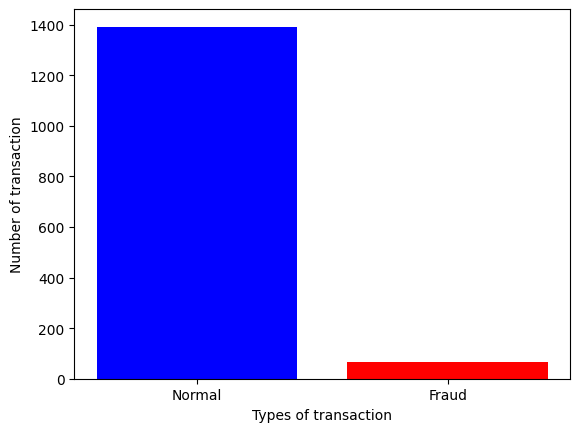

In [ ]:
plt.bar(["Normal","Fraud"],[normal_count,fraud_count],color=['blue','red'])
plt.xlabel("Types of transaction")
plt.ylabel("Number of transaction")
plt.show()

# Decision Tree with Random Forest and Wine Dataset

In [ ]:
wine=datasets.load_wine(as_frame=True)

In [ ]:
Y=wine.target

In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [ ]:
X=wine.data

In [ ]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
X_train,x,Y_train,y=train_test_split(X,Y)

In [ ]:
x_cv,x_test,y_cv,y_test=train_test_split(x,y)

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_cv_predict=rf.predict(x_cv)

In [ ]:
accuracy_score(y_cv,y_cv_predict,normalize=False)

32

In [ ]:
y_cv_predict.shape

(33,)

In [ ]:
y_cv.shape

(33,)

In [ ]:
confusion_matrix(y_cv,y_cv_predict)

array([[ 9,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  8]])

In [ ]:
y_predict=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict,normalize=False)

12

In [ ]:
y_predict.shape

(12,)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[2, 0, 0],
       [0, 4, 0],
       [0, 0, 6]])

# XGBoost with Breast Cancer Dataset

In [ ]:
bc=datasets.load_breast_cancer()

In [ ]:
X=bc.data

In [ ]:
Y=bc.target

In [ ]:
X_train,x,Y_train,y=train_test_split(X,Y)

In [ ]:
x_cv,x_test,y_cv,y_test=train_test_split(x,y)

In [ ]:
xg=XGBClassifier(objective="binary:logistic")

In [ ]:
xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_cv_predict=xg.predict(x_cv)

In [ ]:
accuracy_score(y_cv,y_cv_predict,normalize=False)

102

In [ ]:
y_cv.shape

(107,)

In [ ]:
confusion_matrix(y_cv,y_cv_predict)

array([[41,  3],
       [ 2, 61]])

In [ ]:
y_predict=xg.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict,normalize=False)

34

In [ ]:
y_test.shape

(36,)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[13,  1],
       [ 1, 21]])

# Recommendation System based on Collabrative flitering using Surprise Library SVD (Sigular value decomposition) with Movie Lens Dataset

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811645 sha256=3f178b3fda0e75fb832db0c016c9666fccd4da63450e45139db2e354cbcb1c22
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import SVD,Dataset,accuracy
from surprise.model_selection import train_test_split
from surprise.dataset import DatasetAutoFolds

In [ ]:
data=Dataset.load_builtin("ml-100k")

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
data

In [ ]:
train_data,test_data=train_test_split(data)

In [ ]:
svd=SVD()

In [ ]:
svd.fit(train_data)

In [ ]:
y_predict=svd.test(test_data)

In [ ]:
accuracy.rmse(y_predict)

RMSE: 0.9310


0.9309616747432026

In [ ]:
#Predicting for a paticular user
uid=str(21)
iid=str(3)

In [ ]:
svd.predict(uid,iid,r_ui=4,verbose=True)

user: 21         item: 3          r_ui = 4.00   est = 2.86   {'was_impossible': False}


Prediction(uid='21', iid='3', r_ui=4, est=2.858168358704596, details={'was_impossible': False})